<a href="https://colab.research.google.com/github/tbeucler/ml4rt/blob/master/notebooks_tbeucler/07_SGC_Figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [25]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import colors
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import ticker

import pandas as pd
import numpy as np
import pickle as pkl
import json

from scipy.stats import linregress
from scipy.optimize import curve_fit
from scipy.stats import linregress
from scipy.stats import binned_statistic

In [2]:
fz = 40
lw = 2
siz = 100

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['lines.linewidth'] = lw
plt.rc('font',size=fz)

# Schematic to showcase the added value of nonlinearity

In [29]:
# Generate 50 random numbers between 0 and 1
X = 3*np.random.rand(100)

# Generate noise that linearly increases with X
noise = np.random.normal(scale=X)

# Generate 50 random Y values following an exponential of X with noise
Y = np.exp(X) + noise

# Generate 10^4 points for true X and true Y
true_X = 3*np.random.rand(10000)
true_noise = np.random.normal(scale=true_X)
true_Y = np.exp(true_X) + true_noise

# Display X and Y
print("X:", X)
print("Y:", Y)

X: [2.59840376e+00 1.72663468e+00 1.96591928e+00 1.34232697e+00
 2.82016688e+00 5.17585091e-01 8.10774427e-01 1.92867939e+00
 1.39820854e+00 1.98943610e+00 2.99561769e+00 2.59448542e+00
 2.22059833e+00 3.33680527e-01 1.55894800e+00 9.29707684e-01
 9.06256642e-01 1.64572152e+00 2.58298498e+00 2.53831212e+00
 4.74514766e-01 2.44584848e-02 2.46587515e-01 8.29894521e-01
 2.40841743e+00 2.39400031e+00 9.70482807e-01 4.52810459e-01
 1.06901651e+00 1.16595367e+00 1.48072428e+00 9.47802227e-02
 5.89767024e-01 1.83220613e+00 1.23488371e+00 8.97654389e-01
 2.75807453e+00 6.21164223e-01 3.29590520e-01 1.59795808e+00
 1.55426784e+00 3.31788392e-01 2.84707612e+00 2.42736422e+00
 8.51865225e-01 2.23925076e+00 2.01183667e-03 1.93267958e+00
 1.11341383e-01 2.92366814e+00 1.50776176e+00 5.29486973e-01
 2.15501727e+00 1.08826177e+00 2.59560115e+00 2.59593956e+00
 2.59001586e+00 2.41570883e+00 1.04834784e+00 2.66514434e+00
 4.60470154e-01 2.04082850e+00 1.31694117e+00 3.42749393e-01
 2.81335610e-01 6.503

In [41]:
bin_edges

array([1.45771546e-04, 6.01369259e-02, 1.20128080e-01, 1.80119235e-01,
       2.40110389e-01, 3.00101543e-01, 3.60092698e-01, 4.20083852e-01,
       4.80075006e-01, 5.40066161e-01, 6.00057315e-01, 6.60048469e-01,
       7.20039624e-01, 7.80030778e-01, 8.40021932e-01, 9.00013087e-01,
       9.60004241e-01, 1.01999540e+00, 1.07998655e+00, 1.13997770e+00,
       1.19996886e+00, 1.25996001e+00, 1.31995117e+00, 1.37994232e+00,
       1.43993348e+00, 1.49992463e+00, 1.55991578e+00, 1.61990694e+00,
       1.67989809e+00, 1.73988925e+00, 1.79988040e+00, 1.85987156e+00,
       1.91986271e+00, 1.97985387e+00, 2.03984502e+00, 2.09983617e+00,
       2.15982733e+00, 2.21981848e+00, 2.27980964e+00, 2.33980079e+00,
       2.39979195e+00, 2.45978310e+00, 2.51977425e+00, 2.57976541e+00,
       2.63975656e+00, 2.69974772e+00, 2.75973887e+00, 2.81973003e+00,
       2.87972118e+00, 2.93971233e+00, 2.99970349e+00])

In [51]:
(np.exp(coefficients[1]) * np.exp(coefficients[0]*X)).shape

(100,)

<ipython-input-79-7a18752fb1e5>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(empty_string_labels)
<ipython-input-79-7a18752fb1e5>:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(empty_string_labels)


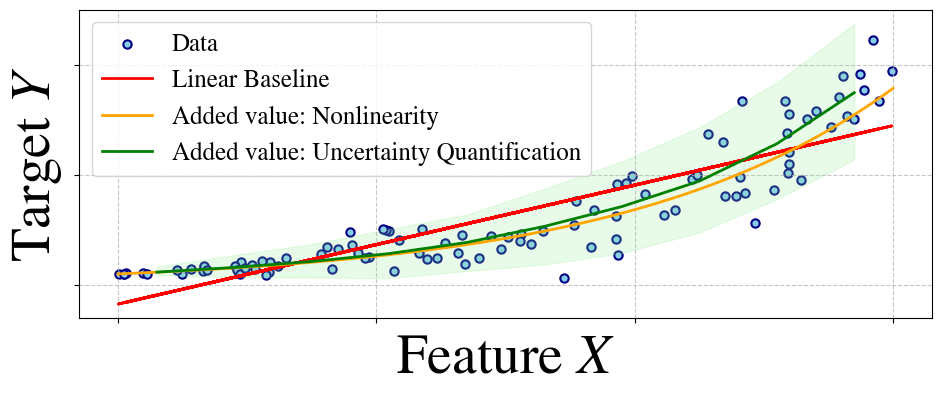

In [79]:
# Scatter plot
fig = plt.figure(figsize=(11, 4))
ax = fig.add_subplot(111)
plt.scatter(X, Y, c='skyblue', edgecolors='navy', linewidth=1.5, label='Data')

# Linear regression
slope, intercept, _, _, _ = linregress(X, Y)
plt.plot(X, slope*X + intercept, color='red', label='Linear Baseline')

# Exponential regression
coefficients = np.polyfit(X, np.log(Y), 1)
X_exp = np.linspace(0,3,1000)
Y_exp = np.exp(coefficients[1]) * np.exp(coefficients[0]*X_exp)
plt.plot(X_exp, Y_exp, color='orange', label='Added value: Nonlinearity')

# # Plot the true Y as a function of true X
bin_means, bin_edges, _ = binned_statistic(true_X, true_Y, statistic='mean', bins=10)
# Adjust bin_edges to have the same length as bin_means for plotting
bin_edg = bin_edges[:-1] + np.diff(bin_edges) / 2
plt.plot(bin_edg, bin_means, color='green', label='Added value: Uncertainty Quantification')

bin_conf_int = [np.percentile(true_Y[(true_X >= bin_edges[i]) & (true_X < bin_edges[i+1])], [2.5, 97.5]) for i in range(len(bin_means))]
plt.fill_between(bin_edg, [ci[0] for ci in bin_conf_int], [ci[1] for ci in bin_conf_int], color='lightgreen', alpha=0.2)

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Set labels with latex font
plt.xlabel(r'Feature $X$')
plt.ylabel(r'Target $Y$')

# Set the number of ticks
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)

# Remove x and y tick labels
# x
labels = [item.get_text() for item in ax.get_xticklabels()]
empty_string_labels = ['']*len(labels)
ax.set_xticklabels(empty_string_labels)
# y
labels = [item.get_text() for item in ax.get_yticklabels()]
empty_string_labels = ['']*len(labels)
ax.set_yticklabels(empty_string_labels)

plt.legend(fontsize=18)
# Show plot
plt.show()

# Deterministic, AI-based, Medium-Range Weather Forecasting

In [ ]:
# Create a dictionary storing performance and number of parameters for each model
MWF = {}

In [ ]:
# Start with number of parameters
MWF['WeynCNN2019'] = 200e3
MWF['WeynCNN2020'] = 700e3
MWF['Rasp2020'] = 6.3e6
MWF['Keisler'] = 6.7e6
MWF['Pathak'] = 75e6
MWF['GraphCast'] = 37e6
MWF['Pangu'] = 256e6